In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
lstm = pd.read_csv('LSTM_7_3day.csv')
gru  = pd.read_csv('GRU_with_sentiment_7_2week.csv')
real = pd.read_csv('orgi.csv') 
lstm_P = pd.read_csv('LSTM_7.csv')
gru_P = pd.read_csv('GRU_7.csv')

In [12]:
lstm.columns = ['Unnamed: 0', 'Date', 'Open_lstm']
gru.columns = ['Unnamed: 0', 'Date', 'Open_gru']
lstm_P.columns = ['Unnamed: 0', 'Date', 'Open_lstm_P']
gru_P.columns = ['Unnamed: 0', 'Date', 'Open_gru_P']

In [14]:
result_1 = pd.merge(lstm, gru, how="inner", on=["Date"])
res = pd.merge(lstm_P, gru_P, how="inner", on=["Date"])
result_7 = pd.merge(result_7, res, how="inner", on=["Date"])
final = pd.merge(real,result_7, how="inner", on=["Date"])

In [15]:
final.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0_x_x,Open_lstm,Unnamed: 0_y_x,Open_gru,Unnamed: 0_x_y,Open_lstm_P,Unnamed: 0_y_y,Open_gru_P
0,2021-01-29,13946.599609,13966.849609,13596.750000,13634.599609,13634.599609,753200,0,14112.892,0,13917.0370,0,14367.145,0,14807.899
1,2021-02-01,13758.599609,14336.349609,13661.750000,14281.200195,14281.200195,870500,3,14387.297,3,14114.2290,3,14607.887,3,15056.730
2,2021-02-02,14481.099609,14731.700195,14469.150391,14647.849609,14647.849609,915000,4,14376.807,4,14135.0580,4,14668.742,4,15107.594
3,2021-02-03,14754.900391,14868.849609,14574.150391,14789.950195,14789.950195,869500,5,14274.611,5,13983.4795,5,14637.672,5,14969.474
4,2021-02-04,14789.049805,14913.700195,14714.750000,14895.650391,14895.650391,884700,6,14252.414,6,13918.0760,6,14622.640,6,14904.574


In [16]:
lstm_data = final['Open_lstm']
gru_dat = final['Open_gru']
lstm_Pdata = final['Open_lstm_P']
gru_Pdata = final['Open_gru_P']
real_data = final['Open'] 

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

Text(0.5, 1.0, '7day window Comparisons')

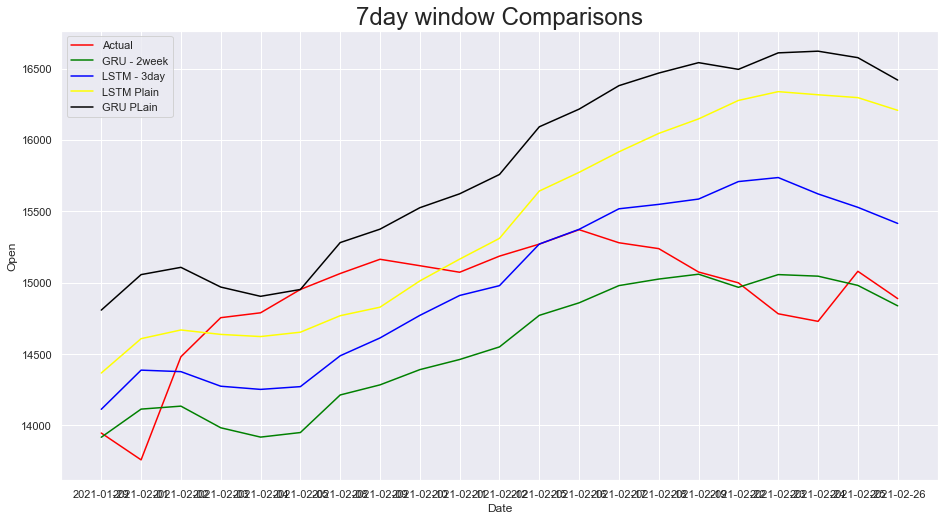

In [18]:
sns.set( rc={'figure.figsize':(15.7,8.27)})
sns.lineplot(final['Date'], final['Open'], color = 'red' , label = 'Actual')
sns.lineplot(final['Date'], final['Open_gru'], color = 'green' , label = 'GRU - 2week')
sns.lineplot(final['Date'], final['Open_lstm'] , color = 'blue' , label = 'LSTM - 3day')
sns.lineplot(final['Date'], final['Open_lstm_P'] , color = 'yellow' , label = 'LSTM Plain')
sns.lineplot(final['Date'], final['Open_gru_P'] , color = 'black' , label = 'GRU PLain')
plt.title("7day window Comparisons" , size =24)

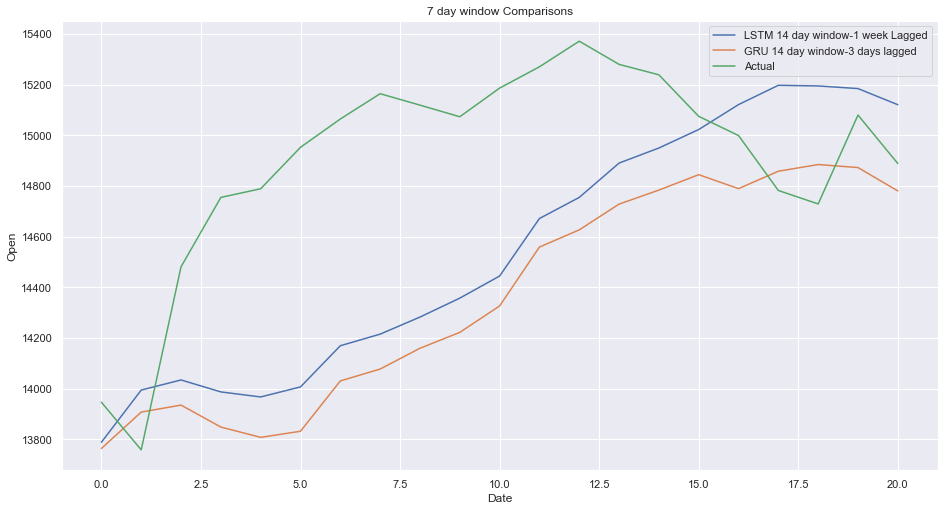

In [29]:
#Plot a line graph
plt.plot(final['Open_lstm'], label='LSTM 14 day window-1 week Lagged')
plt.plot(final['Open_gru'], label='GRU 14 day window-3 days lagged')
plt.plot(final['Open'], label='Actual')

 
# Add labels and title
plt.title("7 day window Comparisons")
plt.xlabel("Date")
plt.ylabel("Open")
 
plt.legend()
plt.show()